# Harika Reddy Kumbum - 50248882

# Sai Nikhila Muthyala - 50245184

In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

# Loading data

def get_iris_df():
  ds = sklearn.datasets.load_iris()
  df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
  code_species_map = dict(zip(
    range(3), ds['target_names']))
  df['species'] = [code_species_map[c]
    for c in ds['target']]
  return df
df = get_iris_df()
#print(df)

In [74]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.title('Breakdown for ' + var, fontsize=25)
plt.savefig('iris_pie_for_one_variable.jpg')
plt.close()


In [75]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True)
plt.title('Total Measurements, by Species')
plt.savefig('iris_pie_for_each_variable.jpg')
plt.close()

In [76]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15,
rot=30)
plt.title('Breakdown for ' + var, fontsize=20)
plt.savefig('iris_bar_for_one_variable.jpg')
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
    kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')
plt.savefig('iris_bar_for_each_variable.jpg')
plt.close()


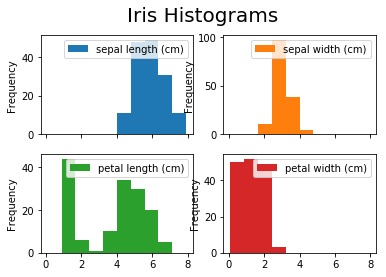

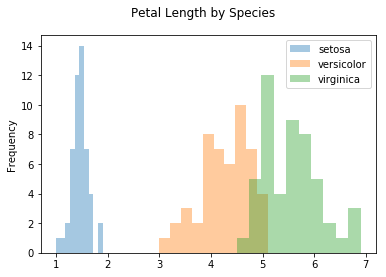

In [77]:
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()
for spec in df['species'].unique():
  forspec = df[df['species']==spec]
  forspec['petal length (cm)'].plot(
    kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.savefig('iris_hist_by_spec.jpg')

In [78]:
col = df['petal length (cm)']
Average = col.mean()
Std = col.std()
Median = col.quantile(0.5)
Percentile25 = col.quantile(0.25)
Percentile75 = col.quantile(0.75)

col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()
print(Median)
print(Clean_Avg)

4.35
4.0984375


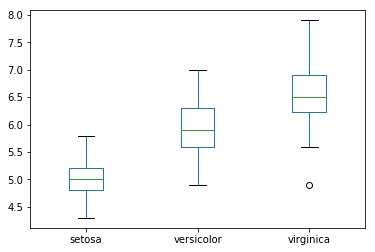

In [79]:
col = 'sepal length (cm)'
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box') 
plt.show()
plt.close()

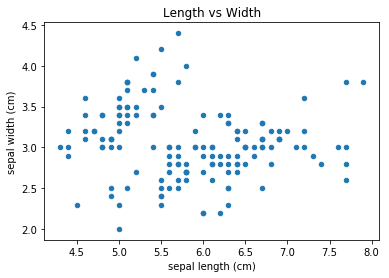

In [80]:
df.plot(kind="scatter",
    x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()

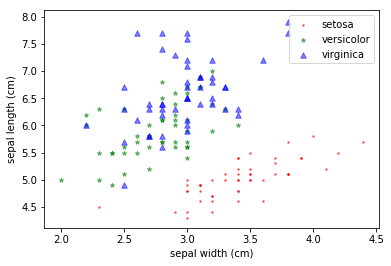

In [81]:
plt.close()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
  ddf = df[df['species']==spec]
  ddf.plot(kind="scatter",
    x="sepal width (cm)", y="sepal length (cm)",
    alpha=0.5, s=10*(i+1), ax=ax,
    color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

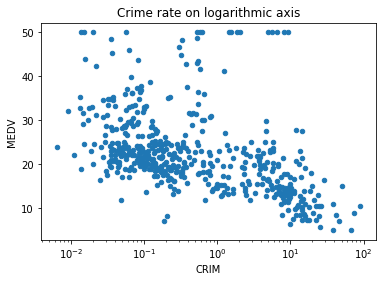

KeyError: 'sepal width (cm)'

In [84]:
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM', y='MEDV', kind='scatter', logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()
#plt.close()
#df.plot(kind="hexbin",x="sepal width (cm)", y="sepal length (cm)")
#plt.show()


C:\Users\nikhi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


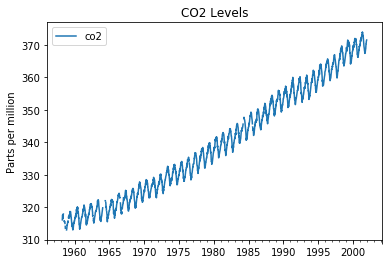

In [85]:
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

          Date         Open         High          Low        Close  \
0   2018-02-23  1112.640015  1127.280029  1104.713989  1126.790039   
1   2018-02-26  1127.800049  1143.959961  1126.694946  1143.750000   
2   2018-02-27  1141.239990  1144.040039  1118.000000  1118.290039   
3   2018-02-28  1123.030029  1127.530029  1103.239990  1104.729980   
4   2018-03-01  1107.869995  1110.119995  1067.000977  1069.520020   
5   2018-03-02  1053.079956  1081.999023  1048.114990  1078.920044   
6   2018-03-05  1075.140015  1097.099976  1069.000000  1090.930054   
7   2018-03-06  1099.219971  1101.849976  1089.775024  1095.060059   
8   2018-03-07  1089.189941  1112.219971  1085.482056  1109.640015   
9   2018-03-08  1115.319946  1127.599976  1112.800049  1126.000000   
10  2018-03-09  1136.000000  1160.800049  1132.461060  1160.040039   
11  2018-03-12  1163.849976  1177.050049  1157.420044  1164.500000   
12  2018-03-13  1170.000000  1176.760010  1133.329956  1138.170044   
13  2018-03-14  1145

C:\Users\nikhi\Anaconda3\lib\site-packages\pandas\core\internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


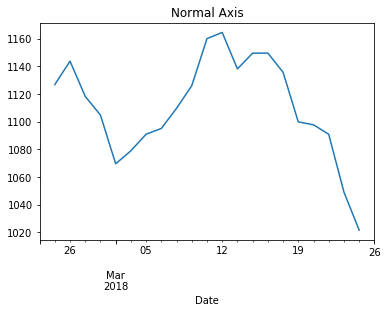

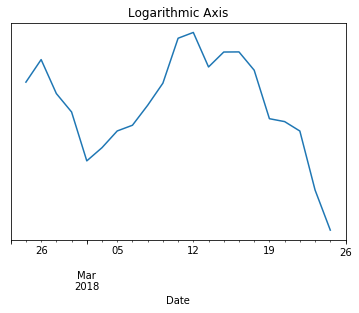

In [91]:
#import urllib
import urllib.request as ur
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Get raw CSV data from the web
#URL = ("http://ichart.finance.yahoo.com/" +
   # "table.csv?s=GOOG&c=2000")
#dat = ur.urlopen(URL).read()
#data = dat.decode('utf-8')
#print(data)
#open('GOOG.csv','w').write(data)
# Make DataFrame, w timestamp as the index
df = pd.read_csv('GOOG.csv')
print(df)
df.index = df['Date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()